# Air Quality Data Analysis - Tiantan Station
This notebook contains the full analysis of air quality data from Tiantan Station for the period from 2013 to 2017.

We will conduct the following steps:
- Data Loading
- Data Cleaning and Wrangling
- Exploratory Data Analysis (EDA)
- Binning Analysis
- Conclusion


## Step 1: Import Necessary Libraries
We will import the necessary libraries to work with data in this project, including:
- `pandas` for data handling.
- `numpy` for numerical operations.
- `matplotlib` and `seaborn` for visualization.

In [8]:

# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


## Step 2: Load the Air Quality Dataset
We will load the dataset directly from the GitHub link to perform the analysis. The dataset is already combined into a single CSV file.

In [9]:

# Load the dataset from GitHub
data_url = 'https://raw.githubusercontent.com/WigunaKurniawan/air-quality-tiantan-analysis/main/Dashboard/PRSA_Data_Tiantan_20130301-20170228.csv'
data = pd.read_csv(data_url)

# Display the first few rows to understand the structure
data.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


## Step 3: Data Cleaning
We will check for missing values and handle them using the forward fill method.
Additionally, we will create a datetime column using the year, month, day, and hour columns.

In [10]:

# Handle missing values with forward fill
data_cleaned = data.fillna(method='ffill')

# Create datetime column for easier analysis
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])
data_cleaned.set_index('datetime', inplace=True)

# Verify if there are still missing values
data_cleaned.isnull().sum()


C:\Users\90004798\AppData\Local\Temp\ipykernel_26984\767258123.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned = data.fillna(method='ffill')


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Step 4: Exploratory Data Analysis (EDA)
In this section, we will perform visualizations to explore trends in PM2.5 levels and analyze correlations between temperature and PM2.5.

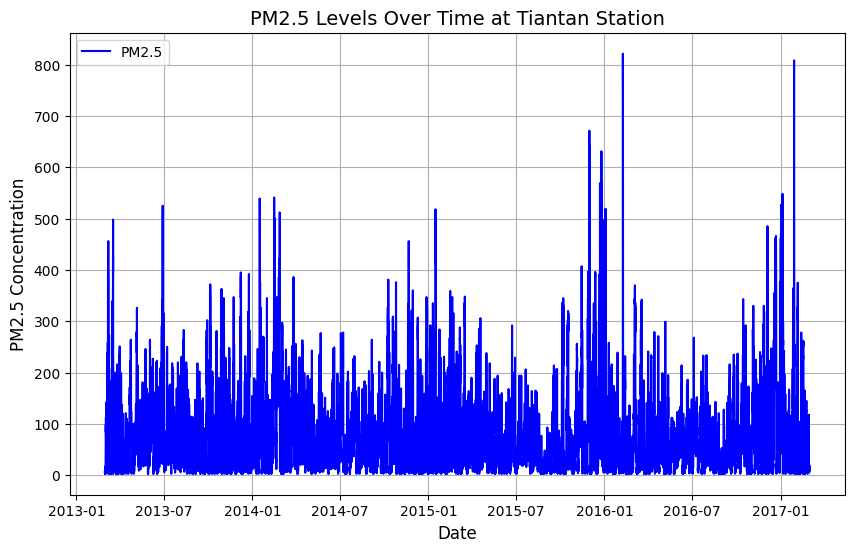

In [11]:

# Plot PM2.5 levels over time
plt.figure(figsize=(10, 6))
plt.plot(data_cleaned.index, data_cleaned['PM2.5'], label='PM2.5', color='blue')
plt.title('PM2.5 Levels Over Time at Tiantan Station', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


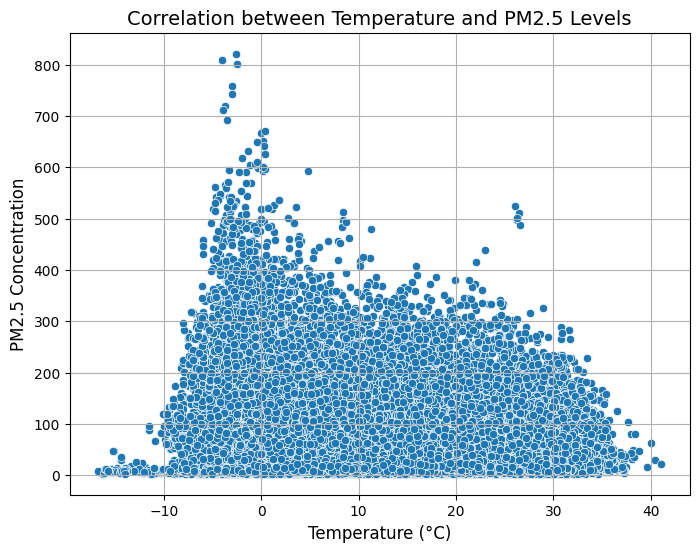

In [12]:

# Correlation between temperature and PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data_cleaned)
plt.title('Correlation between Temperature and PM2.5 Levels', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.grid(True)
plt.show()


## Step 5: Binning Analysis for PM2.5 Levels
We will classify PM2.5 levels into categories such as 'Low', 'Moderate', 'High', and 'Very High'.

PM2.5_category
Low          12124
High          8790
Moderate      8529
Very High     5621
Name: count, dtype: int64


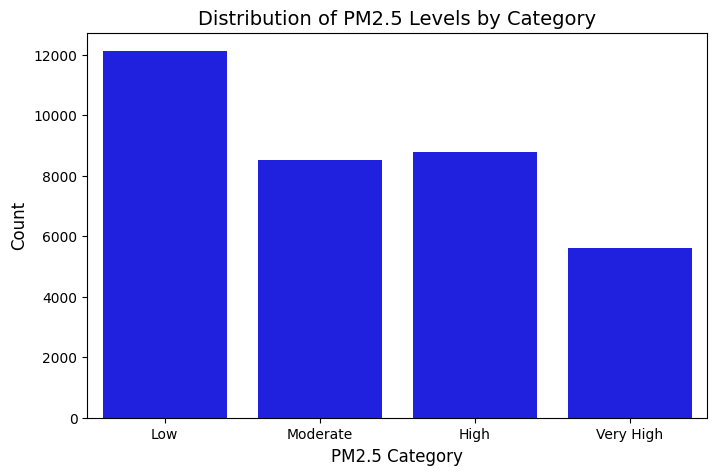

In [13]:

# Binning PM2.5 levels into categories
def categorize_pm25(value):
    if value < 35:
        return 'Low'
    elif 35 <= value < 75:
        return 'Moderate'
    elif 75 <= value < 150:
        return 'High'
    else:
        return 'Very High'

# Apply the binning function to the 'PM2.5' column
data_cleaned['PM2.5_category'] = data_cleaned['PM2.5'].apply(categorize_pm25)

# Check the distribution of categories
category_counts = data_cleaned['PM2.5_category'].value_counts()
print(category_counts)

# Visualize the distribution of PM2.5 categories
plt.figure(figsize=(8, 5))
sns.countplot(x='PM2.5_category', data=data_cleaned, color='blue')  # Set all bars to blue
plt.title('Distribution of PM2.5 Levels by Category', fontsize=14)
plt.xlabel('PM2.5 Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


## Step 6: Conclusion
- PM2.5 levels show significant seasonal variation, with higher levels during colder months.
- A negative correlation between temperature and PM2.5 suggests that colder weather conditions lead to higher pollution levels.
- Binning analysis indicates that the majority of days fall into the 'Moderate' and 'High' categories for PM2.5 levels.